In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [43]:
df = pd.read_csv("BostonHousing.csv")
df.shape

(506, 14)

In [44]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [45]:
(df.isnull().sum()/len(df))*100

crim       0.000000
zn         0.000000
indus      0.000000
chas       0.000000
nox        0.000000
rm         0.988142
age        0.000000
dis        0.000000
rad        0.000000
tax        0.000000
ptratio    0.000000
b          0.000000
lstat      0.000000
medv       0.000000
dtype: float64

In [46]:
df.dropna(inplace=True, axis = 0)

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,501.0,3.647414,8.637688,0.00632,0.08199,0.26169,3.69311,88.9762
zn,501.0,11.402196,23.414214,0.00000,0.00000,0.00000,12.50000,100.0000
indus,501.0,11.160619,6.857123,0.46000,5.19000,9.69000,18.10000,27.7400
chas,501.0,0.069860,0.255166,0.00000,0.00000,0.00000,0.00000,1.0000
nox,501.0,0.555151,0.116186,0.38500,0.44900,0.53800,0.62400,0.8710
rm,501.0,6.284341,0.705587,3.56100,5.88400,6.20800,6.62500,8.7800
age,501.0,68.513373,28.212221,2.90000,45.00000,77.70000,94.00000,100.0000
dis,501.0,3.786423,2.103327,1.12960,2.08820,3.18270,5.11800,12.1265
rad,501.0,9.596806,8.735509,1.00000,4.00000,5.00000,24.00000,24.0000
tax,501.0,409.143713,169.021216,187.00000,279.00000,330.00000,666.00000,711.0000


In [48]:
corr_matrix = df.corr()
corr_matrix.T

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.201470,0.407544,-0.057032,0.420611,-0.219433,0.354739,-0.380572,0.624932,0.582243,0.291731,-0.384064,0.457304,-0.390251
zn,-0.201470,1.000000,-0.536624,-0.043209,-0.518108,0.311173,-0.569695,0.665634,-0.314530,-0.315991,-0.392956,0.176529,-0.413820,0.360031
indus,0.407544,-0.536624,1.000000,0.062351,0.762937,-0.394193,0.646157,-0.709741,0.597721,0.720800,0.382633,-0.357817,0.605595,-0.486625
chas,-0.057032,-0.043209,0.062351,1.000000,0.090371,0.091468,0.087384,-0.098696,-0.008872,-0.037146,-0.121830,0.049972,-0.053698,0.174679
nox,0.420611,-0.518108,0.762937,0.090371,1.000000,-0.302751,0.732899,-0.771108,0.611942,0.666959,0.188830,-0.379640,0.591749,-0.428812
rm,-0.219433,0.311173,-0.394193,0.091468,-0.302751,1.000000,-0.240286,0.203507,-0.210718,-0.292794,-0.357612,0.128107,-0.615721,0.696169
age,0.354739,-0.569695,0.646157,0.087384,0.732899,-0.240286,1.000000,-0.751500,0.460090,0.508338,0.264496,-0.275366,0.601124,-0.375437
dis,-0.380572,0.665634,-0.709741,-0.098696,-0.771108,0.203507,-0.751500,1.000000,-0.497970,-0.534763,-0.231444,0.291847,-0.501168,0.251709
rad,0.624932,-0.314530,0.597721,-0.008872,0.611942,-0.210718,0.460090,-0.497970,1.000000,0.910911,0.467820,-0.443338,0.491477,-0.384730
tax,0.582243,-0.315991,0.720800,-0.037146,0.666959,-0.292794,0.508338,-0.534763,0.910911,1.000000,0.462718,-0.440891,0.545687,-0.471253


In [49]:
# import seaborn as sns
# sns.pairplot(df)

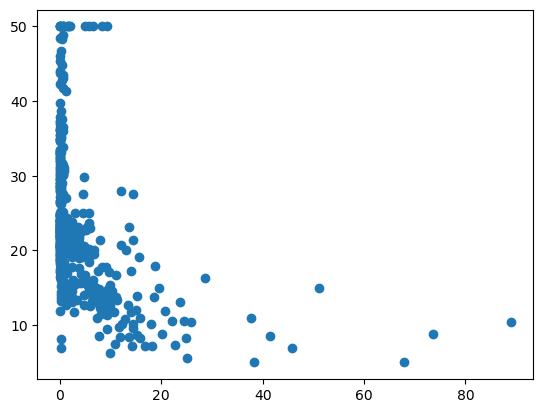

In [50]:
plt.scatter(df['crim'], df["medv"])

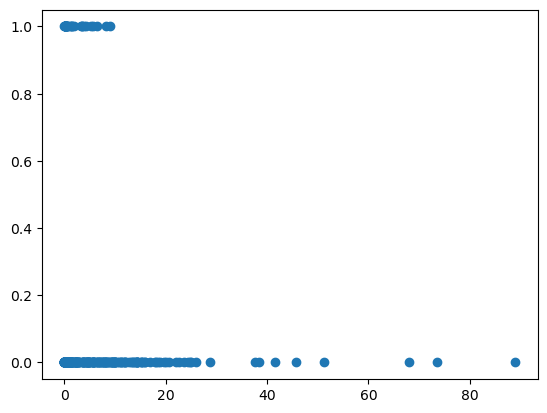

In [51]:
plt.scatter(df['crim'], df['chas'])

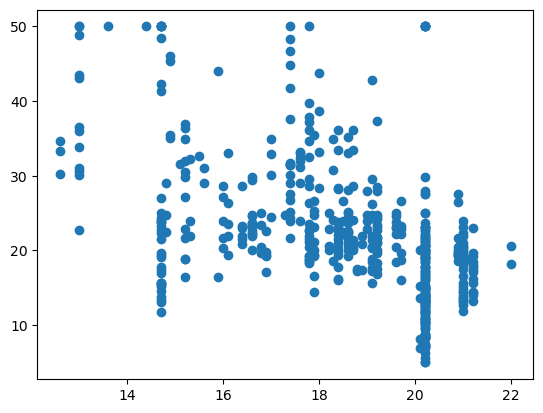

In [52]:
plt.scatter(df['ptratio'], df['medv'])

<Axes: xlabel='ptratio', ylabel='medv'>

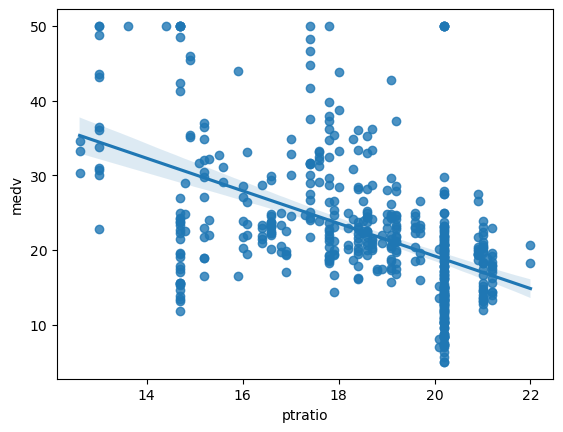

In [53]:
sns.regplot(x='ptratio', y='medv', data = df)

In [54]:
# df.drop(columns = ['chas'], inplace=True)

In [55]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [56]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [57]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [58]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 501, dtype: float64

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
scaler = StandardScaler()

In [63]:
X_train = scaler.fit_transform(X_train)

In [64]:
X_test = scaler.transform(X_test)

In [65]:
import pickle
pickle.dump(scaler, open("scaler.pkl", 'wb'))

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
regression = LinearRegression()

In [68]:
regression.fit(X_train, y_train)

LinearRegression()

In [69]:
print(regression.coef_)

[-0.81333048  1.25793481  0.55901585  0.62921378 -1.90632294  2.57817719
  0.56191215 -2.87590127  2.74653476 -2.09048251 -2.03201533  1.20544035
 -4.54581734]


In [70]:
reg_pred = regression.predict(X_test)

In [71]:
reg_pred

array([11.18470187, 23.00563404, 15.50555989, 33.91377385, 22.85033375,
       11.52120718, 12.87909485, 19.68559436, 21.04526151, 11.33123451,
       18.86863905, 30.14960371, -1.11832542, 25.62332993,  2.86892345,
        8.03143995, 23.74581797, 18.48006615, 25.08802436, -6.69909852,
       13.05721404, 18.91286419, 27.07854376, 19.68268673, 22.34432239,
       16.60552708, 28.66835041, 26.17851266, 18.28698048, 20.9648065 ,
       20.99274995, 30.45869773, 17.88348023, 31.45467817, 31.04568544,
       21.85781507,  7.19466076, 23.35955087,  7.67299185, 25.28772941,
       13.06751099, 35.87850613, 14.55527766, 30.48366917, 12.54855213,
       28.33694316, 30.32808565, 19.98874661, 18.58460772, 13.49196425,
       23.92954047, 33.0591127 , 16.37371772, 11.0238909 , 34.65082608,
       33.84119359, 17.64417679, 18.519131  , 16.23822474, 27.42388838,
       20.31971468, 40.40623824, 20.22919151,  8.17914399, 25.84915232,
       27.38356934, 11.67432851,  7.40048488, 27.04285183, 16.64

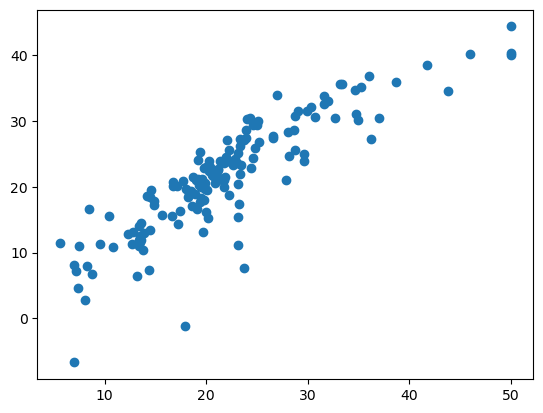

In [72]:
plt.scatter(y_test, reg_pred)

In [73]:
residual = y_test - reg_pred

In [74]:
residual

367    11.915298
76     -3.005634
380    -5.105560
160    -6.913774
108    -3.050334
         ...    
24     -0.109736
227    -1.048031
266     0.148491
435     1.444595
5       3.139275
Name: medv, Length: 151, dtype: float64

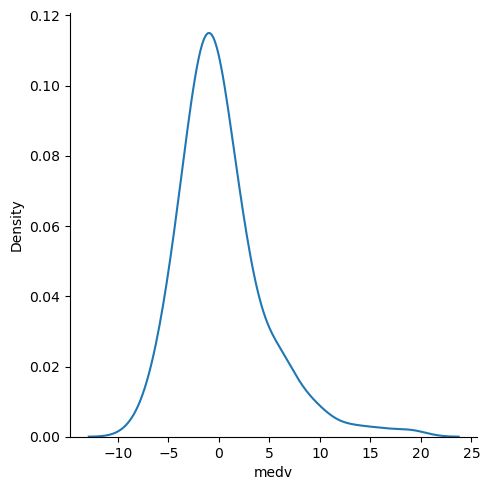

In [75]:
sns.displot(residual, kind='kde')

In [76]:
from sklearn.metrics import mean_squared_error

In [77]:
print(mean_squared_error(y_test, reg_pred))

18.380869507282043


In [78]:
test_input = [[0.00632, 0.01,18.0, 2.31, 0.538, 6.575, 65.2, 4.0900, 1, 296, 15.3, 396.90, 4.98]]
test_input = scaler.transform(test_input)
regression.predict(test_input)

d:\softwares\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([36.52735525])

In [79]:
import pickle 

In [80]:
pickle.dump(regression, open("regmodel.pkl", 'wb'))

In [81]:
pickled_model = pickle.load(open('regmodel.pkl',  'rb'))

In [82]:
pickled_model.predict(test_input)

array([36.52735525])